In [1]:
import g3lhalo
import pyccl as ccl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pip install ../

# Example for (3D) Power spectra
We show here how to compute matter-matter, galaxy-matter and galaxy-galaxy power spectra with the halo model

## Defining the model
See `exampleHalomodelIngredients.ipynb` for details

In [3]:
# Cosmology
cosmo = {
    'Om_c': 0.25,
    'Om_b': 0.045,
    'h': 0.73,
    'sigma_8': 0.9,
    'n_s': 0.96
}

# Halo mass function
hmf=ccl.halos.MassFuncSheth99()

# Halo bias
hbf=ccl.halos.HaloBiasSheth01()

# Concentration mass Relation
cmfunc=ccl.halos.ConcentrationDuffy08()


# HOD
# HOD parameters
alpha=1
sigma=0.2
Mth=1e12
Mprime=20*Mth
beta=1

# Correlation between galaxy populations
A=0 # 0 ==> No correlation between populations
epsilon=0

# Scaling of halo profile concentration
flens=1 # 1 ==> Same as dark matter

# Get HOD
hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

# Define model
model = g3lhalo.halomodel(verbose=True, cosmo=cosmo, hmfunc=hmf, hbfunc=hbf, cmfunc=cmfunc)
model.set_hods(hod_cen, hod_sat, A=A, epsilon=epsilon, flens1=flens, flens2=flens)




Setting cosmology
Om_c: 0.25
Om_b: 0.045
h: 0.73
sigma_8: 0.9
n_s: 0.96
Also setting linear matter power spectrum
Setting halo mass function
<pyccl.halos.hmfunc.sheth99.MassFuncSheth99>
	mass_def = MassDef(Delta=fof, rho_type=matter)
Setting halo bias function
<pyccl.halos.hbias.sheth01.HaloBiasSheth01>
	mass_def = MassDef(Delta=fof, rho_type=matter)
Setting concentration mass relation
<pyccl.halos.concentration.duffy08.ConcentrationDuffy08>
	mass_def = MassDef(Delta=200, rho_type=critical)
	mass_def_strict = True


## Do calculations
We now calculate the linear, matter-matter, matter-galaxy, and galaxy-galaxy power spectra. The non-linear power spectra always give the 1- and 2-halo term seperate, as well as their sum. The parameters `type1` and `type2` specify which lenses (population 1 or 2) shall be correlated.

In [4]:
ks = np.geomspace(1e-3, 1e2)
z=0

# Linear matter power spectrum
Pk_lin = model.pk_lin(ks, z)

# Matter-Matter power spectrum
Pk_ss_1h, Pk_ss_2h, Pk_ss = model.source_source_ps(ks, z)


# Matter-Galaxy power spectrum
Pk_sl_1h, Pk_sl_2h, Pk_sl = model.source_lens_ps(ks, z, type=1)


# Galaxy-Galaxy power spectrum
Pk_ll_1h, Pk_ll_2h, Pk_ll = model.lens_lens_ps(ks, z, type1=1, type2=1)

# Plot

(1, 100000.0)

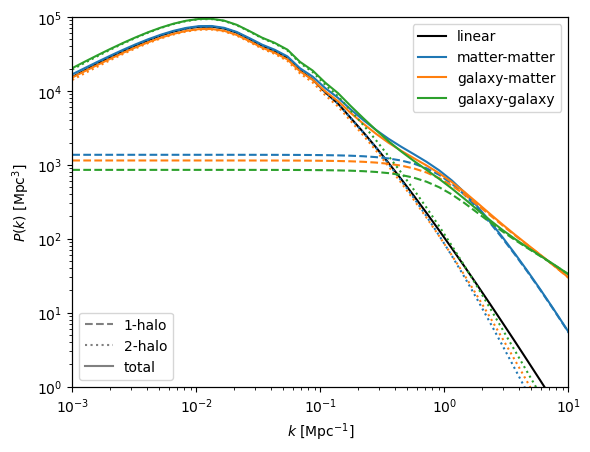

In [5]:

fig, axes=plt.subplots()
axes.loglog(ks, Pk_lin, color='k', label='linear')


axes.loglog(ks, Pk_ss_1h, color='C0', ls='--')
axes.loglog(ks, Pk_ss_2h, color='C0', ls=':')
axes.loglog(ks, Pk_ss, color='C0', label='matter-matter')

axes.loglog(ks, Pk_sl_1h, color='C1', ls='--')
axes.loglog(ks, Pk_sl_2h, color='C1', ls=':')
axes.loglog(ks, Pk_sl, color='C1', label='galaxy-matter')

axes.loglog(ks, Pk_ll_1h, color='C2', ls='--')
axes.loglog(ks, Pk_ll_2h, color='C2', ls=':')
axes.loglog(ks, Pk_ll, color='C2', label='galaxy-galaxy')


plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$P(k)$ [Mpc$^{3}$]')


ax2=axes.twinx()
ax2.plot(np.NaN, np.NaN, ls='--', label='1-halo', color='grey')
ax2.plot(np.NaN, np.NaN, ls=':', label='2-halo', color='grey')
ax2.plot(np.NaN, np.NaN, ls='-', label='total', color='grey')



axes.legend()
ax2.legend(loc='lower left')
ax2.set_yticks([])

axes.set_xlim(1e-3,10)
axes.set_ylim(1, 1e5)

(0.0, 3.0)

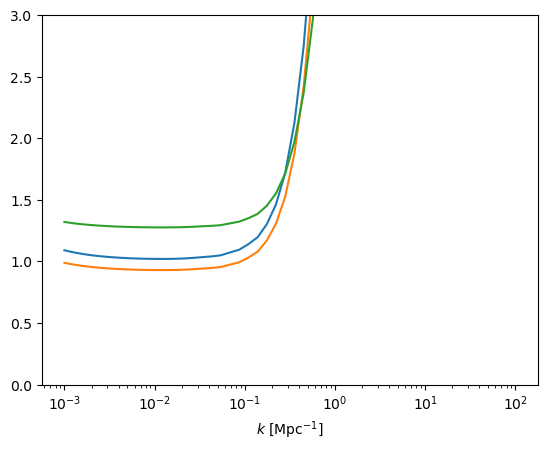

In [6]:
fig, axes=plt.subplots()
axes.semilogx(ks, Pk_ss/Pk_lin, color='C0', label='matter-matter')

axes.semilogx(ks, Pk_sl/Pk_lin, color='C1', label='galaxy-matter')

axes.semilogx(ks, Pk_ll/Pk_lin, color='C2', label='galaxy-galaxy')


plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylim(0, 3)

(0.0, 3.0)

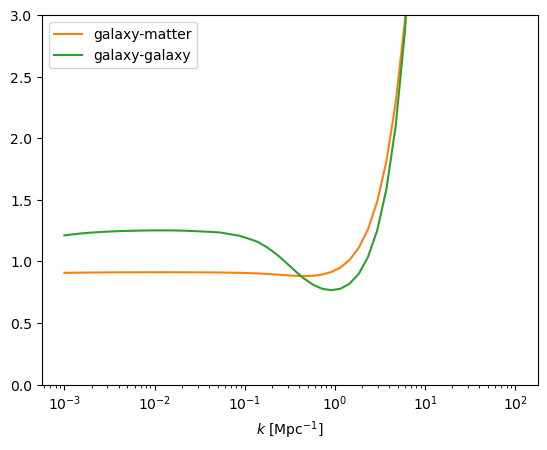

In [7]:
fig, axes=plt.subplots()

axes.semilogx(ks, Pk_sl/Pk_ss, color='C1', label='galaxy-matter')

axes.semilogx(ks, Pk_ll/Pk_ss, color='C2', label='galaxy-galaxy')

plt.legend()
plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylim(0, 3)